<a href="https://colab.research.google.com/github/amirjhn/MachineLearning2025/blob/main/mini_projects/mini_project_1_p1/q1_miniproject1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

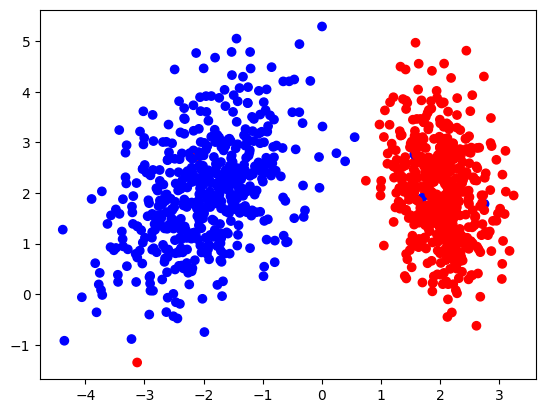

In [ ]:
# part1
X , y = make_classification(n_samples=1000,
                            n_features=2,
                            n_redundant=0,
                            n_classes=2,
                            n_clusters_per_class=1,
                            class_sep=2,
                            random_state=93)
colors = np.array(['red','blue'])
plt.scatter(X[:,0],X[:,1],c=colors[y])
plt.show()

In [ ]:
# part 2 & 3
model=LogisticRegression()
model.fit(X, y)

LogisticRegression()

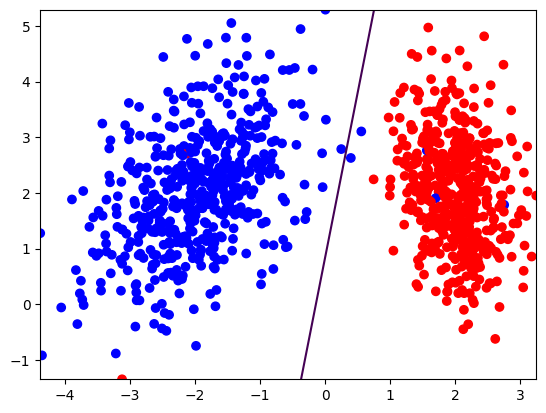

In [ ]:
X1_min , X2_min = X.min(0)
X1_max , X2_max = X.max(0)
n=1000
x1r = np.linspace(X1_min ,X1_max,n)
x2r = np.linspace(X2_min ,X2_max,n)
X1m, X2m = np.meshgrid(x1r,x2r)
Xm = np.stack((X1m.flatten(),X2m.flatten()),axis=1)
ym = model.decision_function(Xm)
plt.scatter(X[:,0],X[:,1],c=colors[y])
plt.contour(X1m, X2m, ym.reshape(X1m.shape), levels=[0])
plt.show()

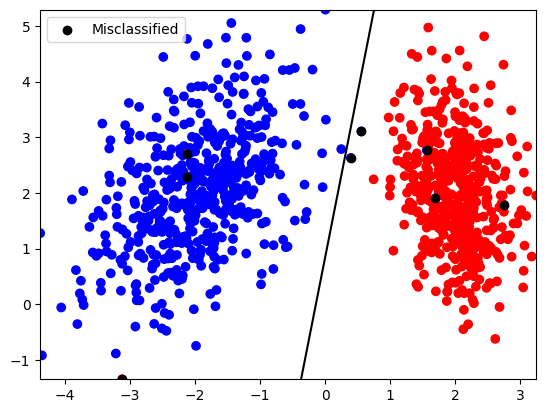

In [ ]:
colors = np.array(['red', 'blue'])

plt.scatter(X[:, 0], X[:, 1], c=colors[y])

y_pred = model.predict(X)

wrong_indices = np.where(y != y_pred)[0]
plt.scatter(X[wrong_indices, 0], X[wrong_indices, 1], c='black', label='Misclassified')
plt.contour(X1m, X2m, ym.reshape(X1m.shape), levels=[0], colors='black')

plt.legend()
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Epoch 1/1000
20/20 [==============================] - 1s 4ms/step - loss: 0.1126 - accuracy: 0.9650
Epoch 2/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0613 - accuracy: 0.9930
Epoch 3/1000
20/20 [==============================] - 0s 6ms/step - loss: 0.0574 - accuracy: 0.9940
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9920
Epoch 5/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9930
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9920
Epoch 7/1000
20/20 [==============================] - 0s 7ms/step - loss: 0.0535 - accuracy: 0.9920
Epoch 8/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9920
Epoch 9/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9910
Epoch 10/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.0558 - accuracy: 0.9920

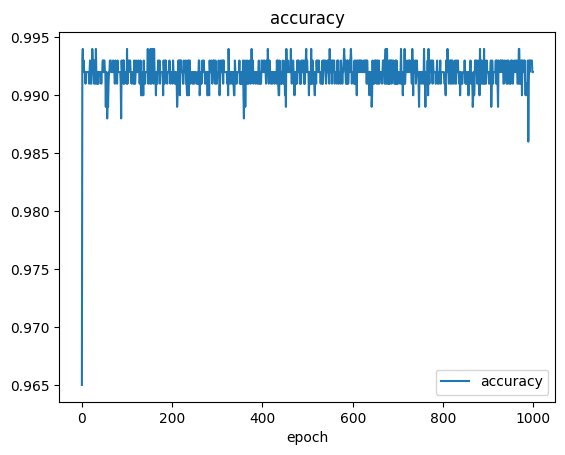

In [ ]:
model = Sequential()
model.add(Dense(units = 1 , input_shape = (2,) , activation = 'sigmoid'))
adam = Adam(learning_rate = 0.3)
model.compile(adam , loss = 'binary_crossentropy' , metrics = ['accuracy'])
h = model.fit(x = X , y = y , verbose = 1 , batch_size = 50 , epochs = 1000 , shuffle = True)
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

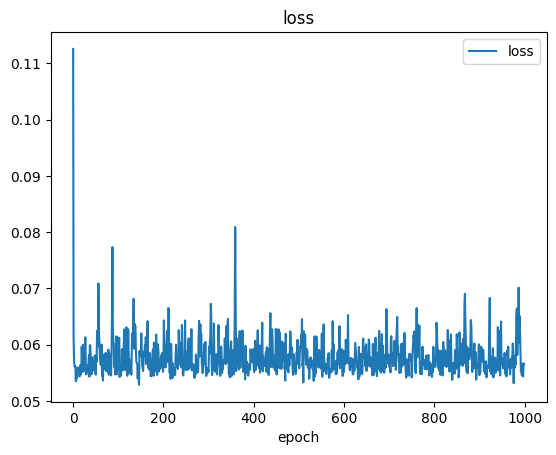

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [ ]:
def plot_decision_boundry(X,y,model):
    x_span = np.linspace (min(X[:,0]),max(X[:,0])+1 , 50)
    y_span = np.linspace (min(X[:,1]),max(X[:,1])+1 , 50)
    xx , yy = np.meshgrid(x_span , y_span)
    xx_,yy_ = xx.ravel() , yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 1ms/step


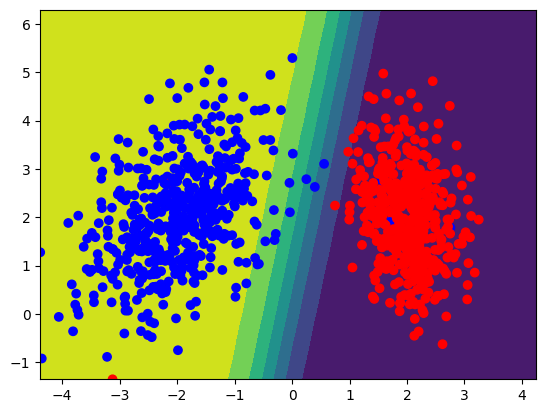

In [ ]:
n_samples=1000
plot_decision_boundry(X,y,model)
plt.scatter(X[:n_samples,0],X[:n_samples,1],c=colors[y])
plt.scatter(X[n_samples:,0],X[n_samples:,1],)


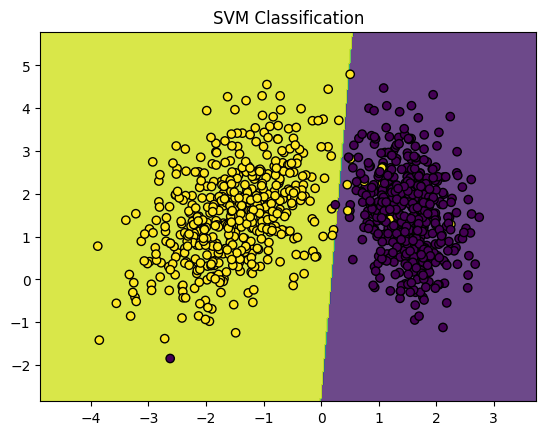

In [ ]:
# part 4
from sklearn.datasets import make_classification
from sklearn.svm import SVC
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=1.5,
                           random_state=93)

model = SVC(kernel='linear')
model.fit(X, y)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title('SVM Classification')
plt.show()

In [ ]:
# part 5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.datasets import make_classification, make_blobs , make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , SGDClassifier


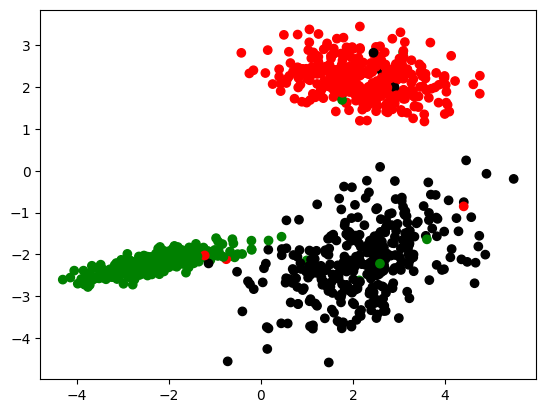

In [ ]:
X , y = make_classification(n_samples=1000,
                            n_features=2,
                            n_redundant=0,
                            n_classes=3,
                            n_clusters_per_class=1,
                            class_sep=2.2,
                            random_state=93)
colors = np.array(['red','black','green'])
plt.scatter(X[:,0],X[:,1],c=colors[y])
plt.show()

In [ ]:
model=LogisticRegression()
model.fit(X, y)

LogisticRegression()

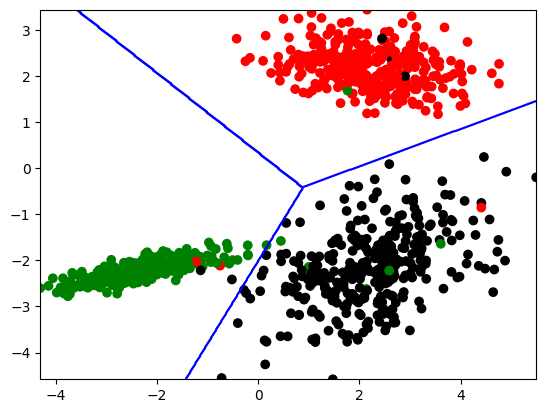

In [ ]:
X1_min, X2_min = X.min(0)
X1_max, X2_max = X.max(0)

n = 500
x1r = np.linspace(X1_min, X1_max, n)
x2r = np.linspace(X2_min, X2_max, n)
X1m, X2m = np.meshgrid(x1r, x2r)
Xm = np.stack((X1m.flatten(), X2m.flatten()), axis=1)
ym = model.predict(Xm)

colors = np.array(['red','black','green'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.contour(X1m, X2m, ym.reshape(X1m.shape), levels=[0, 1, 2], colors='blue')
plt.show()

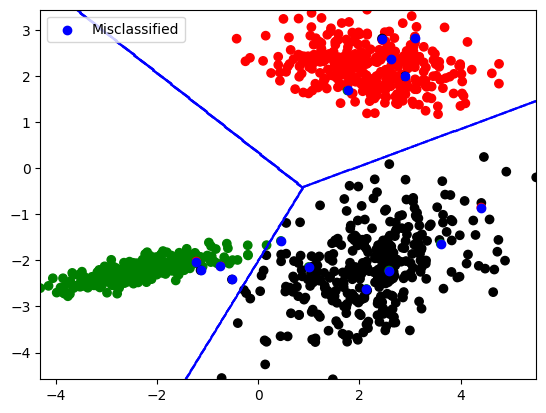

In [ ]:
y_pred = model.predict(X)
colors = np.array(['red','black','green'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.contour(X1m, X2m, ym.reshape(X1m.shape), levels=[0, 1, 2], colors='blue', linestyles='dashed')

wrong_indices = np.where(y != y_pred)[0]
plt.scatter(X[wrong_indices, 0], X[wrong_indices, 1], c='blue', label='Misclassified')

plt.contour(X1m, X2m, ym.reshape(X1m.shape), levels=[0, 1, 2], colors='blue')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

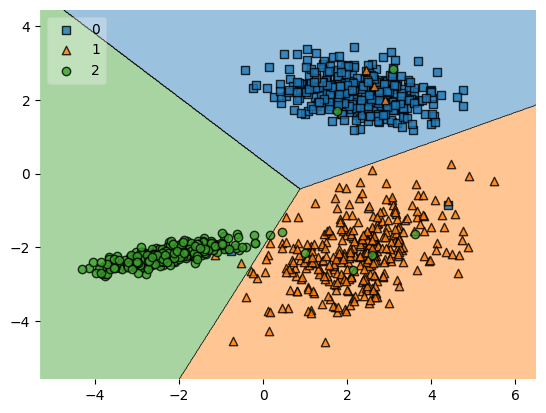

In [ ]:
plot_decision_regions(X, y, clf=model,legend=2)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_cat = to_categorical(y, 3)
model = Sequential()
model.add(Dense(3, input_shape=(2,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7310 - accuracy: 0.7140
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9820
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9800
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9800
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9840
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9830
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9840
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.9850
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9830
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9840
Epoch 11/

In [ ]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = np.argmax(pred_func, axis=1)
    z = z.reshape(xx.shape)
    #z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


79/79 [==============================] - 0s 2ms/step


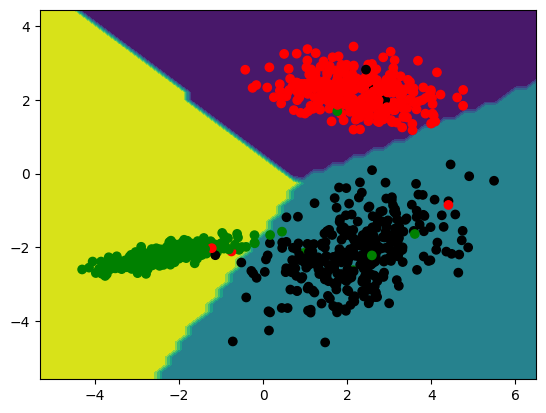

In [ ]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[:1000,0],X[:1000,1],c=colors[y])
plt.scatter(X[1000:,0],X[1000:,1],)